In [ ]:
# Install the required libraries
install.packages("caret")
install.packages("randomForest")
install.packages("Metrics")

In [ ]:
# Load the required libraries
library(tidyverse)
library(caret)
library(ggplot2)
library(knitr)
library(randomForest)
library(Metrics)

#Descriptive Analytics - Summary, Structure, Plots, Correlation Matrix

In [3]:
# Import the data from a CSV file
learning_loss_covid_database <- read.csv("learning_loss_covid_database.csv")

In [4]:
# View the first few rows of the dataset
head(learning_loss_covid_database)

,country,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,⋯,weeks2,pop,schooling,wbcode,region_code,hlo25,oecd,covid,high,covid25
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,Argentina,0.44,39,288.00,8585.69,26.08010,86,457.418,65.0681,67.0396,⋯,1521,45000000,9.51,ARG,Latin America and the Caribbean,18.2967,0,413.418,0,16.5367
2,Australia,0.01,8,60.37,51680.30,29.53870,90,544.360,64.0000,61.0000,⋯,64,26000000,11.54,AUS,Advanced Economies,21.7744,1,543.360,1,21.7344
3,Bangladesh,0.28,63,17.84,2270.35,23.90350,25,340.088,17.0000,70.0000,⋯,3969,170000000,5.91,BGD,South Asia,13.6035,0,312.088,0,12.4835
4,Belgium,0.23,9,284.67,45189.40,54.17840,92,340.088,87.0000,50.0000,⋯,81,11000000,10.69,BEL,Advanced Economies,13.6035,1,317.088,1,12.6835
5,Botswana,0.29,11,118.60,6348.83,6.93809,64,417.656,12.0000,50.0000,⋯,121,2300000,9.55,BWA,Sub-Saharan Africa,16.7062,0,388.656,0,15.5462
6,Brazil,0.32,38,323.07,6814.88,18.65700,81,465.452,64.0000,60.0000,⋯,1444,210000000,7.89,BRA,Latin America and the Caribbean,18.6181,0,433.452,0,17.3381


In [5]:
# Get summary statistics for the dataset
summary(learning_loss_covid_database)

   country               loss            weeks           deaths      
 Length:41          Min.   :0.0000   Min.   : 0.00   Min.   :  1.09  
 Class :character   1st Qu.:0.1400   1st Qu.: 9.00   1st Qu.: 38.32  
 Mode  :character   Median :0.2200   Median :13.00   Median :119.97  
                    Mean   :0.2268   Mean   :20.78   Mean   :152.36  
                    3rd Qu.:0.2900   3rd Qu.:28.00   3rd Qu.:260.63  
                    Max.   :0.8000   Max.   :93.00   Max.   :492.49  
                                                                     
      gdp             private           internet          hlo       
 Min.   :  636.3   Min.   : 0.3852   Min.   :10.00   Min.   :229.2  
 1st Qu.: 3597.2   1st Qu.: 5.1648   1st Qu.:55.00   1st Qu.:389.6  
 Median :12956.6   Median :10.2287   Median :78.00   Median :483.4  
 Mean   :21709.2   Mean   :14.8429   Mean   :69.44   Mean   :462.1  
 3rd Qu.:39918.2   3rd Qu.:19.9098   3rd Qu.:90.00   3rd Qu.:543.1  
 Max.   :87100.4   Max.   

In [6]:
# Use the str() function to describe the structure of the dataset
str(learning_loss_covid_database)

'data.frame':	41 obs. of  24 variables:
 $ country    : chr  "Argentina" "Australia" "Bangladesh" "Belgium" ...
 $ loss       : num  0.44 0.01 0.28 0.23 0.29 0.32 0.45 0.17 0.25 0.22 ...
 $ weeks      : int  39 8 63 9 11 38 40 26 14 7 ...
 $ deaths     : num  288 60.4 17.8 284.7 118.6 ...
 $ gdp        : num  8586 51680 2270 45189 6349 ...
 $ private    : num  26.08 29.54 23.9 54.18 6.94 ...
 $ internet   : int  86 90 25 92 64 81 33 97 88 70 ...
 $ hlo        : num  457 544 340 340 418 ...
 $ vac        : num  65.1 64 17 87 12 ...
 $ stringency : num  67 61 70 50 50 ...
 $ union      : num  27.7 13.7 11.9 49.1 30 13 9.6 29.4 17.1 44.3 ...
 $ polity     : int  9 10 -6 8 8 8 -4 10 10 -7 ...
 $ loggdp     : num  9.06 10.85 7.73 10.72 8.76 ...
 $ logweeks   : num  3.66 NA 4.14 2.2 2.4 ...
 $ weeks2     : int  1521 64 3969 81 121 1444 1600 676 196 49 ...
 $ pop        : int  45000000 26000000 170000000 11000000 2300000 210000000 16000000 37000000 19000000 1400000000 ...
 $ schooling  : num 

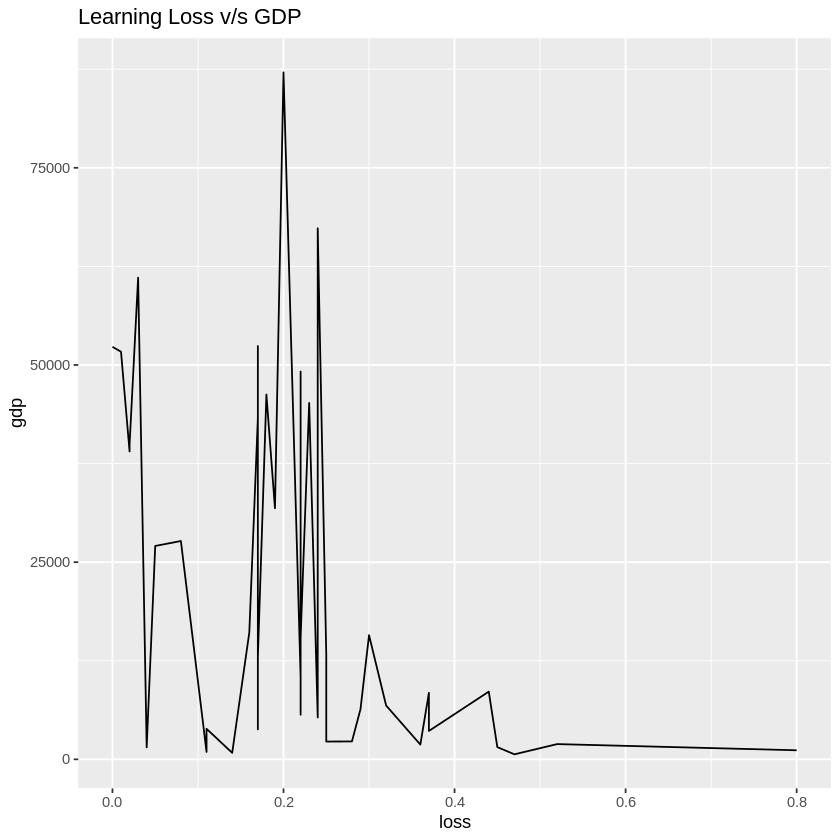

In [7]:
# Plot a line chart of learning loss vs time
ggplot(data = learning_loss_covid_database, aes(x = loss, y = gdp)) +
  geom_line() +
  labs(x = "loss", y = "gdp") +
  ggtitle("Learning Loss v/s GDP")

In [8]:
# Save the plot as image
ggsave("learning_loss_plot.png")

Saving 6.67 x 6.67 in image


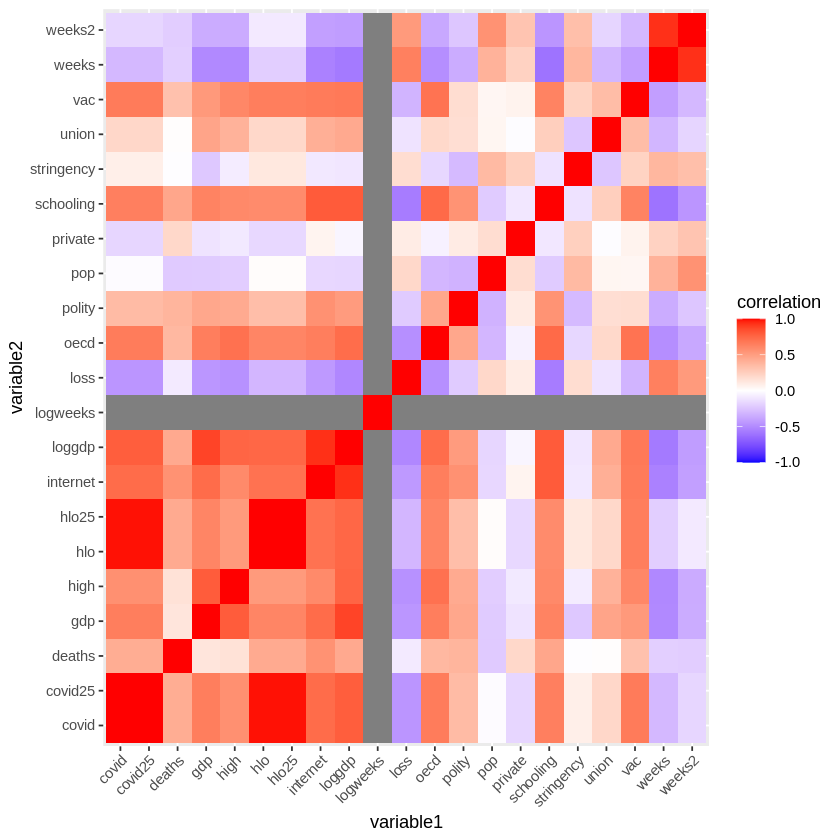

In [9]:
# Select only the numeric variables in the data frame
numeric_vars <- select_if(learning_loss_covid_database, is.numeric)

# Calculate the correlation matrix for the numeric variables
cor_matrix <- cor(numeric_vars)

# Print the correlation matrix
# print(cor_matrix)

# Convert the correlation matrix to a data frame
cor_df <- as.data.frame.matrix(cor_matrix)

# Reshape the data frame for plotting
cor_df <- cor_df %>%
  rownames_to_column(var = "variable1") %>%
  gather(variable2, correlation, -variable1)

# Plot the correlation matrix as a heatmap
ggplot(cor_df, aes(variable1, variable2, fill = correlation)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0, limits = c(-1, 1)) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

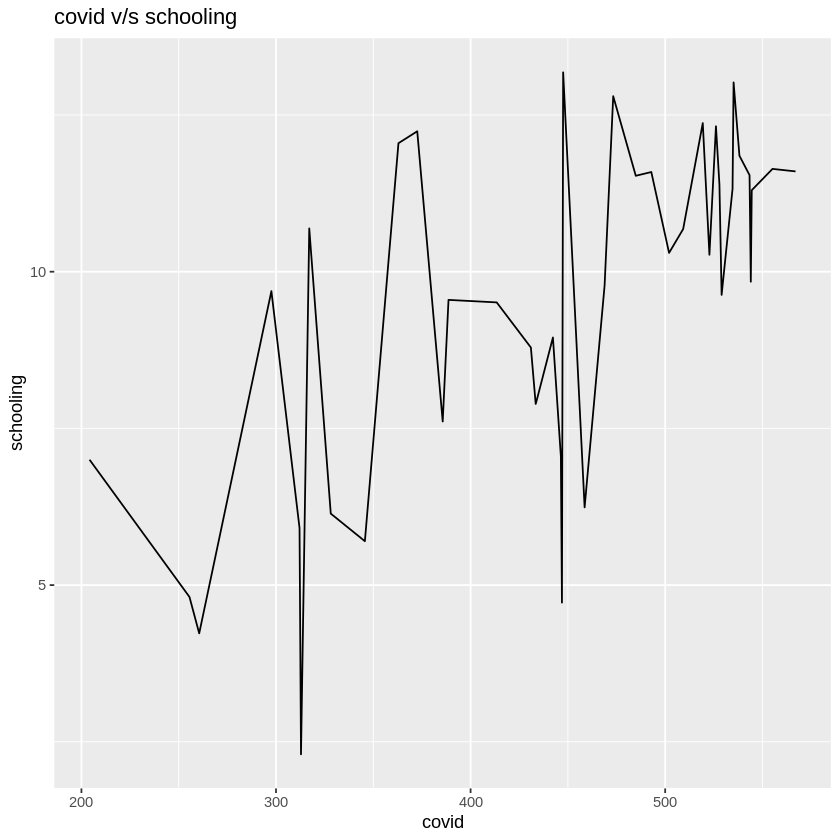

In [10]:
# Plot a line chart of learning loss vs time
ggplot(data = learning_loss_covid_database, aes(x = covid, y = schooling)) +
  geom_line() +
  labs(x = "covid", y = "schooling") +
  ggtitle("covid v/s schooling")

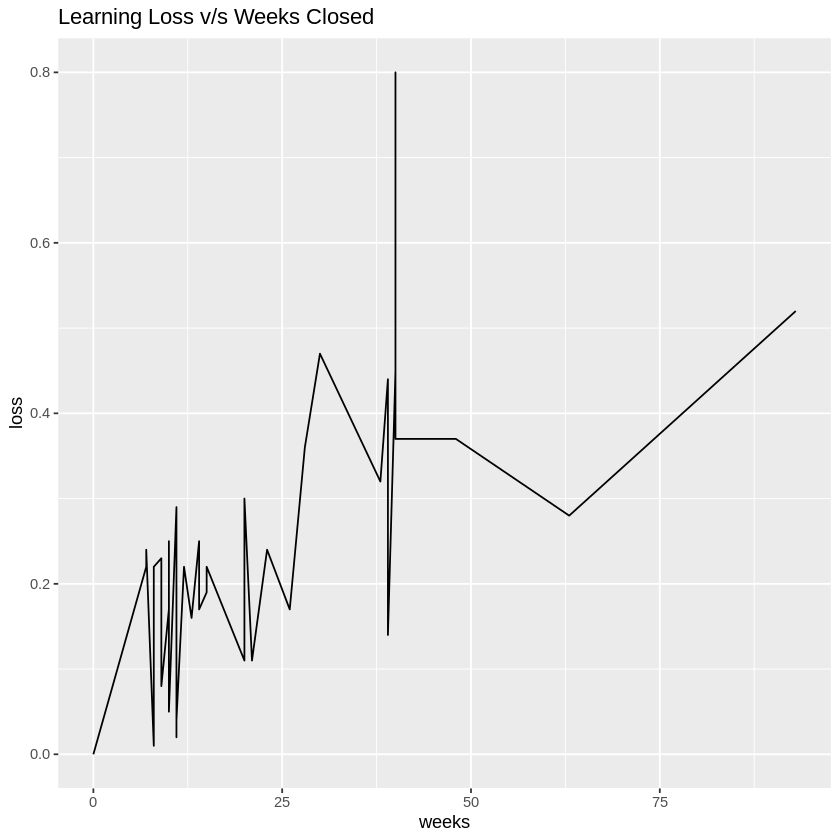

In [11]:
# Plot a line chart of learning loss vs time
ggplot(data = learning_loss_covid_database, aes(x = weeks, y = loss)) +
  geom_line() +
  labs(x = "weeks", y = "loss") +
  ggtitle("Learning Loss v/s Weeks Closed")

#Predictive Analytics - Linear Regression, Random Forest Models

In [12]:
# Replace null values in the 'logweeks' column with 0
numeric_vars$logweeks <- ifelse(is.na(numeric_vars$logweeks), 0, numeric_vars$logweeks)

In [13]:
# Split the data into training and testing sets
set.seed(1234) # for reproducibility
train_index <- createDataPartition(numeric_vars$loss, p = 0.8, list = FALSE)
train_data <- numeric_vars[train_index, ]
test_data <- numeric_vars[-train_index, ]

In [14]:
dim(train_data)

[1] 34 21

In [15]:
head(test_data)

,loss,weeks,deaths,gdp,private,internet,hlo,vac,stringency,union,⋯,loggdp,logweeks,weeks2,pop,schooling,hlo25,oecd,covid,high,covid25
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0.44,39,288.00,8585.69,26.08010,86,457.418,65.0681,67.0396,27.7,⋯,9.057853,3.663562,1521,45000000,9.51,18.2967,0,413.418,0,16.5367
4,0.23,9,284.67,45189.40,54.17840,92,340.088,87.0000,50.0000,49.1,⋯,10.718620,2.197225,81,11000000,10.69,13.6035,1,317.088,1,12.6835
10,0.22,7,1.09,10408.70,8.47976,70,456.000,105.0000,71.0000,44.3,⋯,9.250395,1.945910,49,1400000000,7.95,18.2400,0,434.000,0,17.3600
13,0.03,8,122.83,61063.30,17.37940,97,547.492,88.0000,46.0000,67.0,⋯,11.019670,2.079442,64,5800000,11.30,21.8997,1,544.492,1,21.7797
14,0.17,10,65.22,3798.64,13.84380,55,389.583,104.0000,58.0000,28.4,⋯,8.242397,2.302585,100,55000000,12.24,15.5833,1,372.583,1,14.9033
30,0.80,40,41.25,1147.47,16.57310,38,340.528,24.0000,55.0000,30.2,⋯,7.045317,3.688879,1600,17000000,4.23,13.6211,0,260.528,0,10.4211


In [16]:
# Fit a linear regression model to the training data
lm_model <- lm(loss ~ ., data = train_data)

# Make predictions on the testing data
predictions <- predict(lm_model, newdata = test_data)

In [17]:
# Evaluate the model's performance on the testing data
RMSE <- sqrt(mean((test_data$loss - predictions)^2))
R_squared <- cor(test_data$loss, predictions)^2

# Print the model's performance metrics
cat("RMSE:", RMSE, "\n")
cat("R-squared:", R_squared, "\n")

RMSE: 1.364381e-15 
R-squared: 1 


In [18]:
# Combine the predicted values and true values into a data frame
results <- data.frame("Predicted" = predictions, "Actual" = test_data$loss)

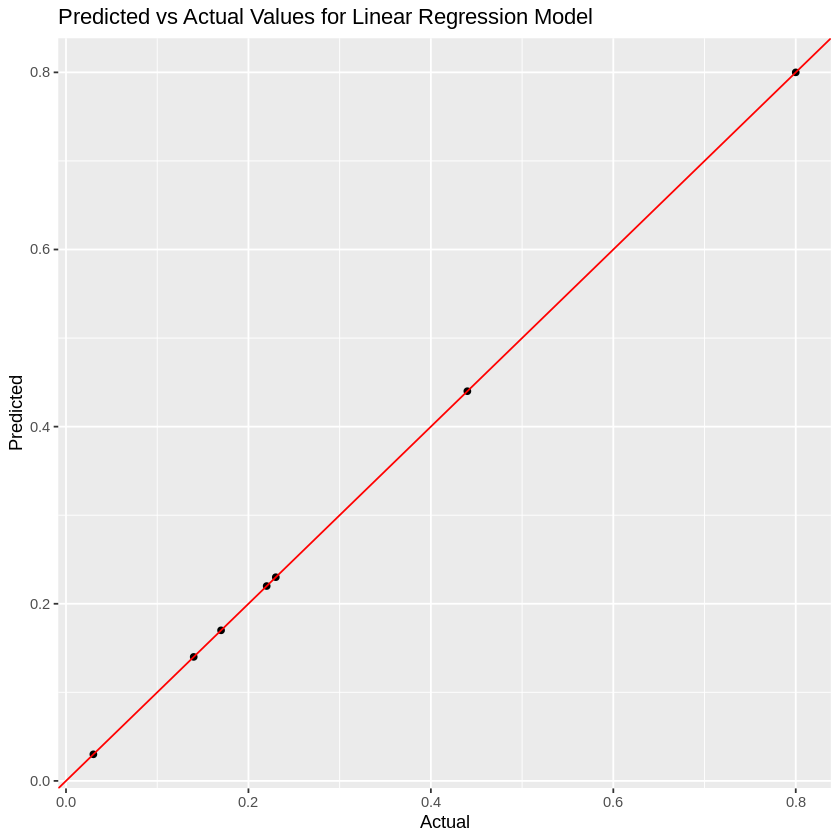

In [19]:
# Use ggplot2 to create a scatter plot of the predicted values vs true values
ggplot(data = results, aes(x = Actual, y = Predicted)) + 
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  ggtitle("Predicted vs Actual Values for Linear Regression Model")

In [20]:
# Use knitr to generate a table of the predicted values vs true values
kable(results, caption = "Actual vs Predicted Values for Linear Regression Model")



Table: Actual vs Predicted Values for Linear Regression Model

|   | Predicted| Actual|
|:--|---------:|------:|
|1  |      0.44|   0.44|
|4  |      0.23|   0.23|
|10 |      0.22|   0.22|
|13 |      0.03|   0.03|
|14 |      0.17|   0.17|
|30 |      0.80|   0.80|
|40 |      0.14|   0.14|

In [21]:
# Build the random forest model
rf_model <- randomForest(loss ~., data = train_data, ntree = 500, mtry = sqrt(ncol(train_data) - 1))

# Make predictions on the testing set
rf_predictions <- predict(rf_model, newdata = test_data)

# Evaluate the model's performance
rmse(test_data$loss, rf_predictions)

[1] 0.1896398

In [22]:
# Combine the predicted values and true values into a data frame
rf_results <- data.frame("Predicted" = rf_predictions, "Actual" = test_data$loss)

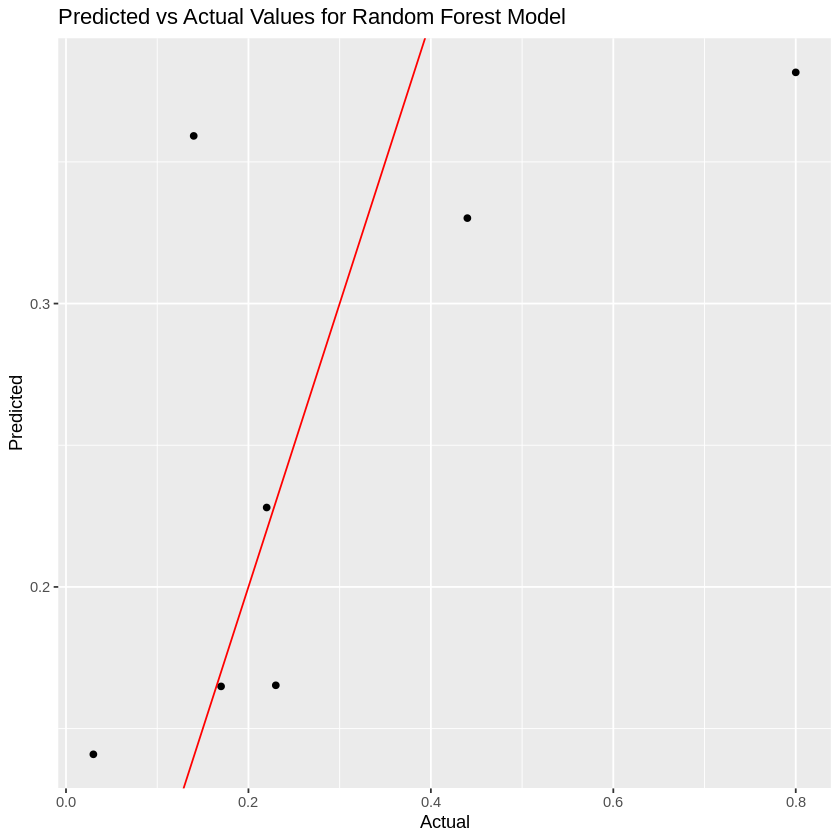

In [23]:
# Use ggplot2 to create a scatter plot of the predicted values vs true values
ggplot(data = rf_results, aes(x = Actual, y = Predicted)) + 
  geom_point() +
  geom_abline(intercept = 0, slope = 1, color = "red") +
  ggtitle("Predicted vs Actual Values for Random Forest Model")

In [24]:
# Use knitr to generate a table of the predicted values vs true values
kable(rf_results, caption = "Actual vs Predicted Values for Random Forest Model")



Table: Actual vs Predicted Values for Random Forest Model

|   | Predicted| Actual|
|:--|---------:|------:|
|1  | 0.3301603|   0.44|
|4  | 0.1652833|   0.23|
|10 | 0.2280303|   0.22|
|13 | 0.1409230|   0.03|
|14 | 0.1648967|   0.17|
|30 | 0.3816027|   0.80|
|40 | 0.3591780|   0.14|